In [221]:
### IMPORT ALL NECCESSARY MODULES AND PACKAGES

# TO PLOT DISTRIBUTIONS
import matplotlib.pyplot as plt

# NUMPY
import numpy as np

# ML MODELS
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier

# ML TEXT HELPERS
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

# ML METRICS
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score


In [222]:
# THIS FUNCTION FILTERS AND RETURNS ALL THE REVIEWS' DOCS AND LABELS
def read_documents(fileName):
    all_docs = []
    all_labels = []

    with open(fileName, encoding='utf-8') as f:
        for line in f:
            words = line.strip().split(" ", 3)
            all_docs.append(words[3])
            all_labels.append(words[1])

    return all_docs, all_labels

In [223]:
# RETRIEVE ALL THE DATA FROM THE PASSED TEXT FILE
textFileData = 'all_sentiment_shuffled.txt'
all_docs, all_labels = read_documents(textFileData)

# FROM THE RETRIEVED DATA, SPLIT THE DATA INTO TRAINING AND EVALUTATION SETS
split_point = int(0.80*len(all_docs))
train_docs = all_docs[:split_point]
train_labels = all_labels[:split_point]
eval_docs = all_docs[split_point:]
eval_labels = all_labels[split_point:]

# SET THE LABELS
targetTypes = ['neg', 'pos'];

# CONVERT LABELS INTO 0 AND 1. 
#'neg'=>0
#'pos'=>1
def getTargets(labels):
    targets = []
    for sentiment in labels:
        if sentiment == 'neg':
            targets.append(0)
        elif sentiment == 'pos':
            targets.append(1)
    return targets

# RETRIEVE CONVERSION FOR TRAINING AND EVALUATION SETS
trainTargets = getTargets(train_labels)
evalTargets = getTargets(eval_labels)

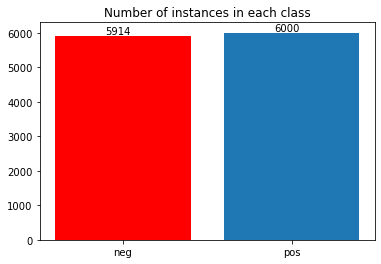

In [224]:
# PLOT THE DISTRIBUTION OF THE NUMBER OF THE INSTANCES IN EACH CLASS
numberData = [all_labels.count(targetTypes[0]),all_labels.count(targetTypes[1])]
barGraph = plt.bar(targetTypes,numberData)
barGraph[0].set_color('r')
plt.title('Number of instances in each class')

# ADD COUNT FOR EACH CLASS TO THE GRAPH
for i, v in enumerate(numberData):
    plt.text(plt.xticks()[0][i] - 0.10, v + 50, str(v))

plt.show()

In [225]:
# TRAINING FOR NAIVE BAYES MODEL 
def trainNaiveBayes(trainDocs, trainTargets):
    return MultinomialNB().fit(trainDocs, trainTargets)

# TRAINING FOR BASE DT MODEL 
def trainBaseDT(trainDocs, trainTargets):
    return DecisionTreeClassifier(criterion="entropy").fit(trainDocs, trainTargets)

# TRAINING FOR BEST DT MODEL 
def trainBestDT(trainDocs, trainTargets):
    return DecisionTreeClassifier(criterion="entropy", splitter="best").fit(trainDocs, trainTargets)

# GIVEN THE ML MODEL AND THE EVALUATION SET, MAKE THE PREDICTIONS
def classify(clf,evalDocs):
    return clf.predict(evalDocs)

# PLOTS THE CONFUSION MATRIX      
def plotConfusionMatrix(clf,prediction):
    plot_confusion_matrix(clf, eval_docs_tfidf, evalTargets)
    return confusion_matrix(evalTargets, prediction)
        
# RETRIEVE OUTPUT CLASSIFICATION METRICS
def metrics(predicted):
    precision,recall,f1,support = precision_recall_fscore_support(evalTargets, predicted)
    return precision,recall,f1

# MEASURES THE PREDICTION ACCURACY OF THE MODEL
def accuracy(predicted):
    return accuracy_score(evalTargets, predicted)

In [226]:
# CONVERT EACH WORD OF THE VOCABULARY FOUND IN THE TRAINING 
# TO A CORRESPONDING INDEX AND COUNT EACH WORD
# NOTE: TO SEE THE VOCABULARY OF THE TRAINING SET: print(countVect.get_feature_names())
# NOTE: TO OUTPUT THE INDEX OF A WORD IN THE VOCAB (from countVect.get_feature_names()): countVect.vocabulary_.get('WORD') 
# UNDERSTANDING COUNTVECTORIZER()
# EX |(0, 23)     1|
# 0 is the index corresponding to the review, so 0 is the first review about a bad album
# 23 corresponds to the word at index 23 in countVect.get_feature_names()
# 1 is the number of times word 23 shows up in review 0
countVect = CountVectorizer()

### PREPARING TRAINING SET
train_docs_counts = countVect.fit_transform(train_docs)
tfidf_transformer = TfidfTransformer()
train_docs_tfidf = tfidf_transformer.fit_transform(train_docs_counts)
# TRAINING DONE

### PREPARING EVALUATION SET
eval_docs_counts = countVect.transform(eval_docs)
eval_docs_tfidf = tfidf_transformer.transform(eval_docs_counts)
# EVALUATION SET DONE


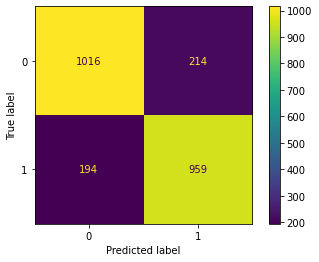

In [227]:
# NAIVES BAYES CLASSIFIER
nb = trainNaiveBayes(train_docs_tfidf, trainTargets)
nbPrediction = classify(nb,eval_docs_tfidf)
nbMetrics=[]

# CONFUSION MATRIX
nbMetrics.append(plotConfusionMatrix(nb,nbPrediction))

# RETRIEVE METRICS
nbPrecision, nbRecall, nbF1_measure = metrics(nbPrediction)
nbMetrics.append(nbPrecision)
nbMetrics.append(nbRecall)
nbMetrics.append(nbF1_measure)

# RETRIEVE ACCURACY OF PREDICTIONS
nbMetrics.append(accuracy(nbPrediction))

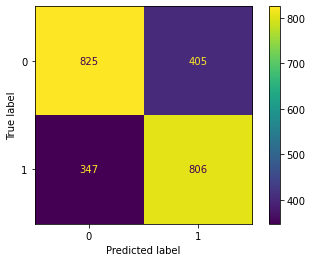

In [228]:
# BASE DT CLASSIFIER
baseDT = trainBaseDT(train_docs_tfidf, trainTargets)
baseDTPrediction = classify(baseDT,eval_docs_tfidf)
baseDTMetrics=[]

# CONFUSION MATRIX
baseDTMetrics.append(plotConfusionMatrix(baseDT,baseDTPrediction))

# RETRIEVE METRICS
baseDTPrecision, baseDTRecall, baseDTF1_measure = metrics(baseDTPrediction)
baseDTMetrics.append(baseDTPrecision)
baseDTMetrics.append(baseDTRecall)
baseDTMetrics.append(baseDTF1_measure)

# RETRIEVE ACCURACY OF PREDICTIONS
baseDTMetrics.append(accuracy(baseDTPrediction))

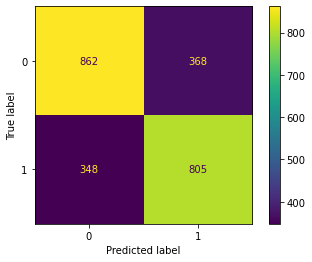

In [229]:
# BEST DT CLASSIFIER
bestDT = trainBestDT(train_docs_tfidf, trainTargets)
bestDTPrediction = classify(bestDT,eval_docs_tfidf)
bestDTMetrics=[]

# CONFUSION MATRIX
bestDTMetrics.append(plotConfusionMatrix(bestDT,bestDTPrediction))

# RETRIEVE METRICS
bestDTPrecision, bestDTRecall, bestDTF1_measure = metrics(bestDTPrediction)
bestDTMetrics.append(bestDTPrecision)
bestDTMetrics.append(bestDTRecall)
bestDTMetrics.append(bestDTF1_measure)

# RETRIEVE ACCURACY OF PREDICTIONS
bestDTMetrics.append(accuracy(bestDTPrediction))

In [230]:
def modelToFile(modelType,modelMetrics,prediction):
    
    #CREATE OUTPUT FILE
    file = open(modelType+"-"+textFileData,"w")
    
    file.write("LEGEND\n-----------------------\n")
    file.write("0: neg, 1: pos")
    file.write("\n\n\n")
    
    # WRITE CONFUSION MATRIX
    file.write("CONFUSION MATRIX\n")
    file.write("(row is true label, column is predicted label)\n-----------------------\n")
    file.write("| " + str(modelMetrics[0][0][0].item()) + " | " + str(modelMetrics[0][0][1].item()) + " |")
    file.write("\n--------------\n")
    file.write("| " + str(modelMetrics[0][1][0].item()) + " | " + str(modelMetrics[0][1][1].item())+ " |")
    file.write("\n\n\n")
    
    # WRITE PRECISION VALUES
    file.write("PRECISION VALUES\n-----------------------\n")
    file.write(targetTypes[0] +": " + str(modelMetrics[1][0].item()) +"\n")
    file.write(targetTypes[1] +": " + str(modelMetrics[1][1].item()) +"\n")
    file.write("\n\n")
    
    # WRITE RECALL VALUES
    file.write("RECALL VALUES\n-----------------------\n")
    file.write(targetTypes[0] +": " + str(modelMetrics[2][0].item()) +"\n")
    file.write(targetTypes[1] +": " + str(modelMetrics[2][1].item()) +"\n")
    file.write("\n\n")
    
    # WRITE F1-MEASURE VALUES
    file.write("F1-MEASURE VALUES\n-----------------------\n")
    file.write(targetTypes[0] +": " + str(modelMetrics[3][0].item()) +"\n")
    file.write(targetTypes[1] +": " + str(modelMetrics[3][1].item()) +"\n")
    file.write("\n\n")
    
    # WRITE ACCURACY
    file.write("PREDICTION ACCURACY\n-----------------------\n")
    file.write("The model's accuracy is: " + str(modelMetrics[4].item()) +"\n")
    file.write("\n\n")
    
    # WRITE REVIEW LINE NUMBER AND THE PREDICTION OF THE MODEL
    file.write("BELOW ARE ALL THE PREDICTIONS MADE FOR EACH INSTANCES IN THE EVALUATION SET\n(0-indexed)\n--------------\n")
    index = split_point;
    for pred in prediction:
        file.write('%i, %s%s\n' % (index, pred, ' [Misclassified]' if evalTargets[index-split_point] != pred else ''))
        index+=1
         
    file.close()
    
# OUTPUT TO FILES 
modelToFile("NaiveBayesClassifier",nbMetrics,nbPrediction)
modelToFile("BaseDT",baseDTMetrics,baseDTPrediction)
modelToFile("BestDT",bestDTMetrics,bestDTPrediction)